#**Automobile price prediction**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("AutoData (1).csv")

##Exploring automobile dataset

In [3]:
df.shape

(205, 25)

In [4]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.709756
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.851862
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
dups = df.duplicated()
df[dups].sum()

symboling           0.0
make                0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

##Exploring Columns (Categorical Variables)

In [10]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [11]:
df['make'].value_counts()

toyota corolla               6
toyota corona                6
peugeot 504                  6
subaru dl                    4
mitsubishi outlander         3
                            ..
plymouth fury gran sedan     1
volkswagen model 111         1
peugeot 304                  1
toyota celica gt liftback    1
bmw z4                       1
Name: make, Length: 147, dtype: int64

In [12]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [13]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

##Exploring target variable

In [14]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

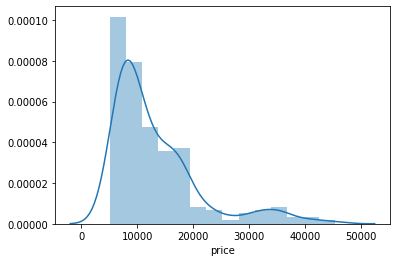

In [15]:
sns.distplot(df['price'])

We can easily observe that the data is positively skewed as shown in the above distplot.

In [16]:
df['brand'] = df.make.str.split(' ').str.get(0).str.upper()

In [17]:
df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['MAXDA'], 'MAZDA')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')
df['brand'] = df['brand'].replace(['TOYOUTA'], 'TOYOTA')

In [18]:
df['brand'].describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: brand, dtype: object

[Text(0, 0.5, 'Avg Price ($)'), Text(0.5, 0, 'Brand')]

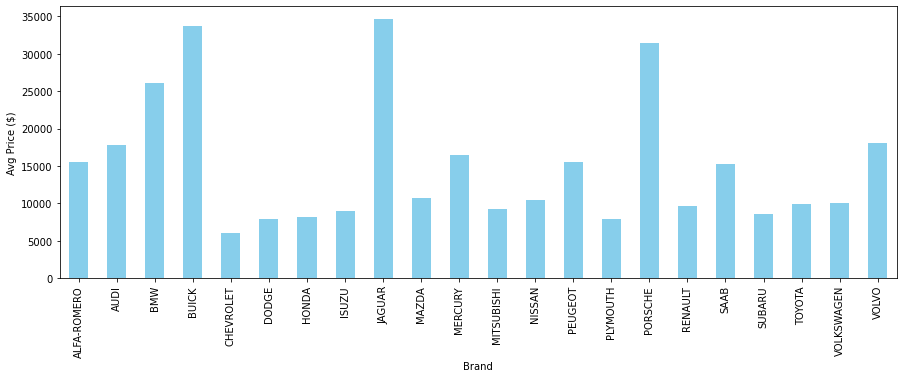

In [19]:
avg_price = df[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt = avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,5),color="skyblue")
plt.set(xlabel="Brand",ylabel="Avg Price ($)")

In [20]:
df['brand_category'] = df['price'].apply(lambda x : "Lower_Range" if x < 10000 
                                                     else ("Middle_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

[Text(0, 0.5, 'Avg Price($)'), Text(0.5, 0, 'Symbol')]

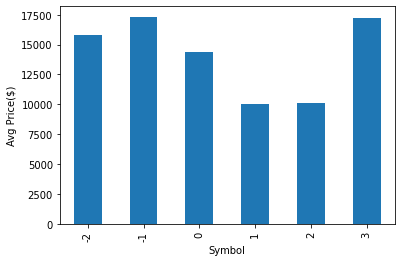

In [21]:
plt = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt.set(xlabel='Symbol',ylabel='Avg Price($)')

[Text(0, 0.5, 'Avg Price($)'), Text(0.5, 0, 'Fuel Type')]

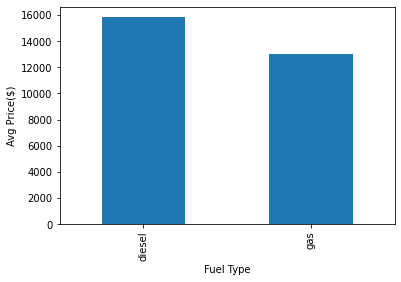

In [22]:
fuel_avg_price = df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt = fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt.set(xlabel="Fuel Type",ylabel="Avg Price($)")

[Text(0, 0.5, 'Avg Price($)'), Text(0.5, 0, 'Aspiration')]

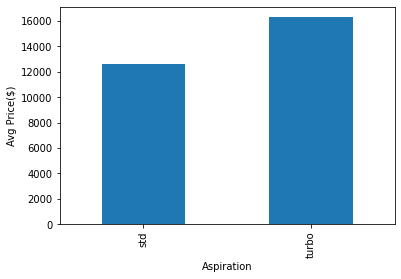

In [23]:
aspir_avg_price = df[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt = aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt.set(xlabel="Aspiration",ylabel="Avg Price($)")

[Text(0, 0.5, 'Avg Price($)'), Text(0.5, 0, 'Door Number')]

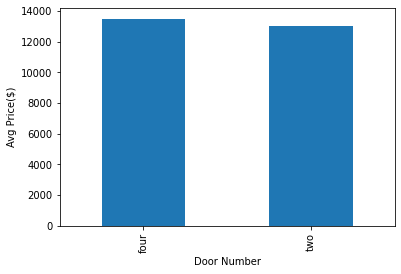

In [24]:
door_avg_price = df[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt = door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt.set(xlabel="Door Number",ylabel="Avg Price($)")

[Text(0, 0.5, 'Avg Price($)'), Text(0.5, 0, 'Car Body')]

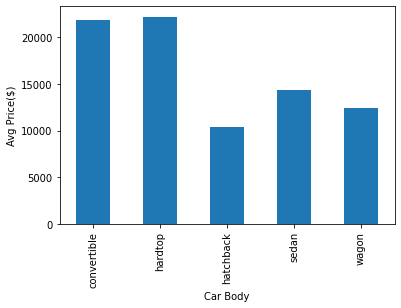

In [25]:
body_avg_price = df[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'body_avg_price'})
plt = body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt.set(xlabel="Car Body",ylabel="Avg Price($)") 

In [26]:
temp = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price','brand_category']]

In [27]:
temp.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Middle_Range
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Middle_Range
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Middle_Range
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Middle_Range
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Middle_Range


As we know that the Linear Regression Model does not work on categorical variable. Hence, we have to encode the columns with the help of label encoding(dummification).

In [28]:
cylin_no = pd.get_dummies(temp['cylindernumber'], drop_first = True)

In [29]:
temp = pd.concat([temp, cylin_no], axis = 1)

In [30]:
brand = pd.get_dummies(temp['brand_category'], drop_first = True)

In [31]:
temp = pd.concat([temp, brand], axis = 1)

In [32]:
engine = pd.get_dummies(temp['enginetype'], drop_first = True)

In [33]:
temp = pd.concat([temp, engine], axis = 1)

In [34]:
drivewh = pd.get_dummies(temp['drivewheel'], drop_first = True)

In [35]:
temp = pd.concat([temp, drivewh], axis = 1)

In [36]:
body = pd.get_dummies(temp['carbody'], drop_first = True)

In [37]:
temp = pd.concat([temp, body], axis = 1)

In [38]:
asp = pd.get_dummies(temp['aspiration'], drop_first = True)

In [39]:
temp = pd.concat([temp, asp], axis = 1)

In [40]:
fuel = pd.get_dummies(temp['fueltype'], drop_first = True)

In [41]:
temp = pd.concat([temp, fuel], axis = 1)

In [42]:
temp.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

In [43]:
temp.corr(method='pearson')

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,five,four,six,three,twelve,two,Luxury,Middle_Range,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,0.402946,0.290210,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,-0.460355,0.498830,-0.008608,-0.386094,0.291086,0.210899,0.257611,-0.308346
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920,0.259894,-0.400210,0.262981,-0.187445,0.100413,-0.057877,0.429395,0.410388,0.009391,0.261715,-0.274413,-0.118320,0.244053,-0.057877,-0.508714,0.538370,0.047292,-0.436269,0.269647,0.219683,0.234539,-0.212679
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325,0.397690,-0.523135,0.209246,-0.183473,0.153516,-0.013699,0.552077,0.312797,0.209136,0.210771,-0.286211,-0.124446,0.348869,-0.013699,-0.472116,0.511149,0.066360,-0.222308,0.154637,0.060639,0.300567,-0.233880
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,0.583766,0.378132,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,-0.666039,0.669987,0.098956,-0.287501,0.099425,0.164075,0.324902,-0.217275
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762,0.705524,0.111067,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,-0.518391,0.565509,0.239363,-0.216805,0.088459,-0.027518,0.108217,-0.069594
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173,-0.007797,-0.164076,0.128365,-0.108774,0.054482,0.000127,0.350281,0.324576,0.158136,0.181729,-0.410383,0.326798,0.119509,0.000127,-0.583087,0.574105,0.208089,-0.227032,0.030517,0.105719,0.212614,-0.054451
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139,0.110692,-0.639552,0.533544,-0.099600,0.280220,0.019250,0.569262,0.274858,0.326367,-0.054469,-0.427616,0.044752,0.431539,0.019250,-0.544438,0.575564,0.194801,-0.053770,-0.024097,-0.063081,0.241685,0.163926
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000,0.249606,-0.697762,0.474978,-0.071388,0.199634,-0.004544,0.829241,0.131463,0.159225,0.042267,-0.344270,0.016285,0.385991,-0.004544,-0.601950,0.638957,0.225854,-0.262039,0.125717,-0.042310,0.177926,-0.105680
five,0.261182,0.259894,0.397690,0.264554,0.144878,-0.007797,0.110692,0.249606,1.000000,-0.442706,-0.086709,-0.016672,-0.016672,-0.033591,0.234495,0.078327,-0.016672,-0.059376,0.147775,-0.066906,-0.061961,-0.033591,-0.063230,-0.003498,0.063799,-0.125816,0.080203,0.043564,0.225968,-0.213527
four,-0.309492,-0.400210,-0.523135,-0.576463,-0.631431,-0.164076,-0.639552,-0.697762,-0.442706,1.000000,-0.676996,-0.130168,-0.130168,-0.262272,-0.638291,-0.078640,-0.130168,0.084311,0.396945,0.016427,-0.483772,-0.262272,0.425481,-0.434461,-0.133132,0.066757,-0.034178,0.057522,0.009195,0.020184


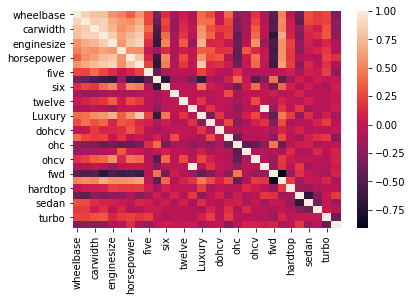

In [44]:
cols=temp.columns
correlations=temp[cols].corr()
sns.heatmap(correlations)

##Train-Test split

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X_new = temp.drop(['price'], axis = 1)  
y_new = temp.price
x_train , x_test , y_train , y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 100)

##**Model Building**

#Linear Regression

In [47]:
# Importing the libraries
def LinearRegression():
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_squared_error as mse
    import matplotlib.pyplot as plt
    
    #Model fitting on training set
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    
    #prediction for train test and test test
    y_pred_train = lr.predict(x_train)
    y_pred_test = lr.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - lr.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - lr.predict(x_test))** 2)
    print('   Linear   Regression    ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
        
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('   Linear   Regression    ')
    print()
    
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    
   # Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)

   Linear   Regression    
Train MSE is 2861673.0187367904
Test MSE is 5190708.620984051
Train RMSE is: 1691.648018571473
Test RMSE is 2278.312669715035
r2 score is 0.932622133496252
   Linear   Regression    

None


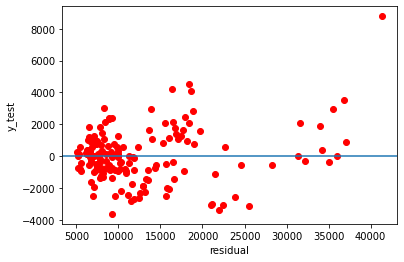

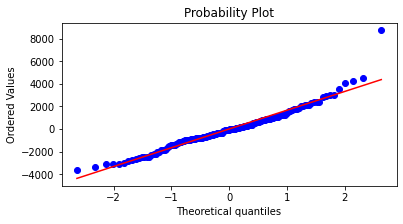

In [48]:
print(LinearRegression())

In [49]:
temp.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Luxury', 'Middle_Range', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas'],
      dtype='object')

##Linear Regression model building with the help of OLS.

In [50]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Luxury', 'Middle_Range', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [51]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          5.05e-101
Time:                        15:18:04   Log-Likelihood:                -1821.5
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     176   BIC:                             3797.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1266.9189   9938.498     -0.127   

Removing columns having p-values more than 0.5.

In [52]:
#curbweight carlength

In [53]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[['wheelbase',  'carwidth',  'enginesize',
       'boreratio', 'horsepower', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Luxury', 'Middle_Range', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [54]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          3.87e-103
Time:                        15:18:04   Log-Likelihood:                -1821.6
No. Observations:                 205   AIC:                             3697.
Df Residuals:                     178   BIC:                             3787.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2211.5459   9259.191     -0.239   

In [55]:
#rwd three

In [56]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[['wheelbase',  'carwidth',  'enginesize',
       'boreratio', 'horsepower', 'five', 'four', 'six', 
       'twelve', 'two', 'Luxury', 'Middle_Range', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'fwd',  'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [57]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          5.31e-105
Time:                        15:18:04   Log-Likelihood:                -1822.4
No. Observations:                 205   AIC:                             3695.
Df Residuals:                     180   BIC:                             3778.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5197.6331   8727.590     -0.596   

In [58]:
#rotor two

In [59]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[['wheelbase',  'carwidth',  'enginesize',
       'boreratio', 'horsepower', 'five', 'four', 'six', 
       'twelve', 'Luxury', 'Middle_Range', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv',  'fwd',  'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [60]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     153.9
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          5.14e-106
Time:                        15:18:04   Log-Likelihood:                -1822.6
No. Observations:                 205   AIC:                             3693.
Df Residuals:                     181   BIC:                             3773.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4525.6638   8647.172     -0.523   

In [61]:
#ohcv wheelbase

In [62]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[[ 'carwidth',  'enginesize',
       'boreratio', 'horsepower', 'five', 'four', 'six', 
       'twelve', 'Luxury', 'Middle_Range', 'dohcv', 'l', 'ohc', 'ohcf',
         'fwd',  'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [63]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     166.5
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          2.16e-107
Time:                        15:18:04   Log-Likelihood:                -1824.8
No. Observations:                 205   AIC:                             3694.
Df Residuals:                     183   BIC:                             3767.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5109.1293   8574.160     -0.596   

In [64]:
#sedan wagon

In [65]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[[ 'carwidth',  'enginesize',
       'boreratio', 'horsepower', 'five', 'four', 'six', 
       'twelve', 'Luxury', 'Middle_Range', 'dohcv', 'l', 'ohc', 'ohcf',
         'fwd',  'hardtop', 'hatchback', 
       'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [66]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          4.43e-109
Time:                        15:18:04   Log-Likelihood:                -1826.3
No. Observations:                 205   AIC:                             3693.
Df Residuals:                     185   BIC:                             3759.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1506.3708   8290.947     -0.182   

In [67]:
#carwidth hardtop

In [68]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[['enginesize',
       'boreratio', 'horsepower', 'five', 'four', 'six', 
       'twelve', 'Luxury', 'Middle_Range', 'dohcv', 'l', 'ohc', 'ohcf',
         'fwd', 'hatchback', 
       'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [69]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          7.22e-110
Time:                        15:18:04   Log-Likelihood:                -1830.2
No. Observations:                 205   AIC:                             3696.
Df Residuals:                     187   BIC:                             3756.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.161e+04   2818.166      4.118   

In [70]:
#l

In [71]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[[ 'enginesize',
       'boreratio', 'horsepower', 'five',  'six', 
       'twelve', 'Luxury', 'Middle_Range', 'dohcv','ohcf',
         'fwd', 'hatchback', 
       'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [72]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     229.5
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          8.18e-111
Time:                        15:18:04   Log-Likelihood:                -1836.7
No. Observations:                 205   AIC:                             3703.
Df Residuals:                     190   BIC:                             3753.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.176e+04   2885.232      4.076   

In [73]:
#ohcf

In [74]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = temp[[   'enginesize','boreratio','horsepower','six','twelve','Luxury',
              'Middle_Range','dohcv','fwd', 'hatchback', 'turbo', 'gas']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(temp['price'],X)
    model = regr2.fit()
    
    print(model.summary())

In [75]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     266.0
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          1.41e-112
Time:                        15:18:04   Log-Likelihood:                -1838.4
No. Observations:                 205   AIC:                             3703.
Df Residuals:                     192   BIC:                             3746.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9066.6922   2449.226      3.702   

Now, there are no columns having P-value greater than 0.05.
Hence, this is the final **Linear Regression** Model.

#**Desision Tree Regression**

In [76]:
def Decision_Tree():
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    

    #Model fitting on training set
    reg = DecisionTreeRegressor(criterion="mse",max_depth=2,random_state=10)
    reg.fit(x_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = reg.predict(x_train)
    y_pred_test = reg.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - reg.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - reg.predict(x_test))** 2)
    print('               Decision_Tree        ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    
    print('               Decision_Tree        ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)

               Decision_Tree        
Train MSE is 4670413.8932767315
Test MSE is 8800355.337996675
Train RMSE is: 2161.1140398592415
Test RMSE is 2966.5392864407972
r2 score is 0.8857672024293526
               Decision_Tree        
None


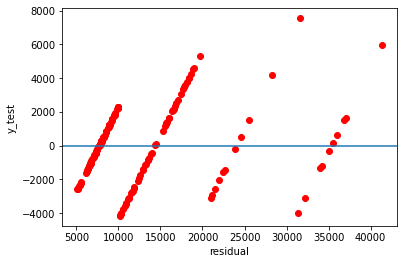

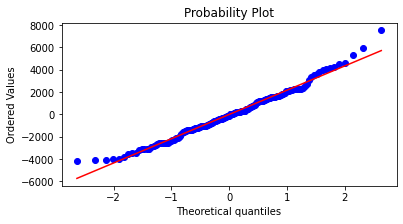

In [77]:
print(Decision_Tree())

#Model Comparison

| Algorithm | Train RMSE | Test RMSE | R2 Score|
| --- | --- | --- | --- |
| Linear Regression | 1691.64 | 2278.31 | 0.943 |
| Decision Regression | 2161.11 | 2966.53 | 0.8857 |


After comparing both the linear and decision tree regression model as a result we found **Linear Regression** as an optimal solution for this problem which fits best fot this dataset.